In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def casco_graham(lpontos):
    lpontos=list(np.array(lpontos))
    lpontos.sort(key=lambda x:x[1])
    p0=lpontos.pop(0)
    angs=[]
    hor=np.array([-1,0])
    d={} # d[angulo]=indice do ponto
    for i,ponto in enumerate(lpontos):
        lin=ponto-p0
        ang= np.arccos(np.dot(hor,lin)/np.linalg.norm(lin))
        angs.append(ang)
        d[ang]=i
    angs.sort(reverse=True)
    l=lpontos.copy()
    lpontos=[l[d[ang]] for ang in angs]
    casco=[p0,lpontos.pop(0)]
    for ponto in lpontos:
        u=len(casco)-1
        ult=casco[u]
        penult=casco[u-1] 
        penlin=penult-ult # linha ultimo p/ penultimo
        ponlin=ponto-ult # linha ultimo p/ ponto atual
        mods=np.linalg.norm(ponlin)*np.linalg.norm(penlin)
        ang=np.arcsin(np.cross(ponlin,penlin)/mods) #ordem importa em cross
        while ang<0:  # enquanto o angulo formado for côncavo
            u-=1
            ult=casco[u]
            penult=casco[u-1] 
            penlin=penult-ult
            ponlin=ponto-ult
            mods=np.linalg.norm(ponlin)*np.linalg.norm(penlin)
            ang=np.arcsin(np.cross(ponlin,penlin)/mods)        
        for t in range(len(casco)-1,u,-1): casco.pop(t) #remove pontos que criariam ângulo côncavo
        casco.append(ponto)
    casco+=[casco[0]]
    return np.array(casco)

In [31]:
lpontos=[[2,11],[3,3],[4.5,6],[2.7,7.3],[5,7],[6,11],
         [7,2],[8,5],[4,10]]
apontos=np.array(lpontos)
c=casco_graham(lpontos).T

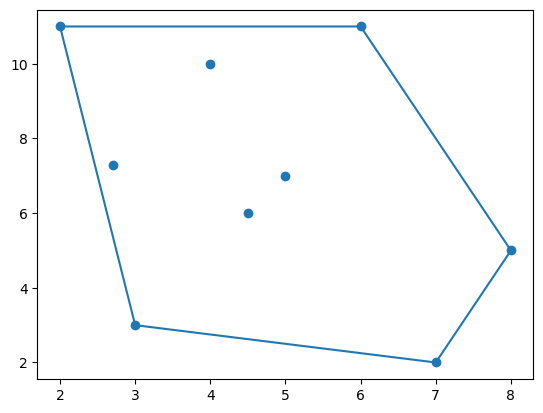

In [32]:
plt.scatter(apontos.T[0],apontos.T[1])
plt.plot(c[0],c[1])